In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

!pip install geopy
from geopy.distance import geodesic
import geopy.distance

In [2]:
file = 'clean_delivery.csv'
delivery = pd.read_csv(file, index_col=False)
print(delivery)

       Unnamed: 0       ID Delivery_person_ID  Delivery_person_Age  \
0               0  0x4607     INDORES13DEL02                  37.0   
1               1  0xb379     BANGRES18DEL02                  34.0   
2               2  0x5d6d     BANGRES19DEL01                  23.0   
3               3  0x7a6a    COIMBRES13DEL02                  38.0   
4               4  0x70a2     CHENRES12DEL01                  32.0   
...           ...      ...                ...                  ...   
45588       45588  0x7c09      JAPRES04DEL01                  30.0   
45589       45589  0xd641      AGRRES16DEL01                  21.0   
45590       45590  0x4f8d     CHENRES08DEL03                  30.0   
45591       45591  0x5eee    COIMBRES11DEL01                  20.0   
45592       45592  0x5fb2   RANCHIRES09DEL02                  23.0   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
0                          4.9            22.745049             75.892471   
1    

<AxesSubplot:xlabel='Time_taken(min)', ylabel='Count'>

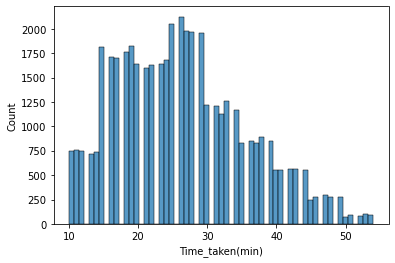

In [3]:
# let's observe each individual category and see how relevant they might be
# if a category is potentially irrelevant, wait to clean it until necessary
sns.histplot(x='Time_taken(min)', data=delivery)

In [4]:
delivery['City'].value_counts()

Metropolitian     34093
Urban             10136
Semi-Urban          164
Name: City, dtype: int64

In [5]:
delivery['Weatherconditions'].value_counts()

 Fog           7654
 Stormy        7586
 Cloudy        7536
 Sandstorms    7495
 Windy         7422
 Sunny         7284
Name: Weatherconditions, dtype: int64

In [6]:
delivery['Road_traffic_density'].value_counts()

Low        15477
Jam        14143
Medium     10947
High        4425
Name: Road_traffic_density, dtype: int64

In [7]:
delivery['multiple_deliveries'].value_counts()

1.0    28159
0.0    14095
2.0     1985
3.0      361
Name: multiple_deliveries, dtype: int64

In [8]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   45593 non-null  int64  
 1   ID                           45593 non-null  object 
 2   Delivery_person_ID           45593 non-null  object 
 3   Delivery_person_Age          43739 non-null  float64
 4   Delivery_person_Ratings      43685 non-null  float64
 5   Restaurant_latitude          45593 non-null  float64
 6   Restaurant_longitude         45593 non-null  float64
 7   Delivery_location_latitude   45593 non-null  float64
 8   Delivery_location_longitude  45593 non-null  float64
 9   Order_Date                   45593 non-null  object 
 10  Time_Orderd                  43862 non-null  object 
 11  Time_Order_picked            45593 non-null  object 
 12  Weatherconditions            44977 non-null  object 
 13  Road_traffic_den

In [9]:
delivery = delivery.drop(columns=['Unnamed: 0', 'Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings', 'Type_of_vehicle', 'Type_of_order', 'City'])

In [10]:
#delivery = delivery.rename(columns = {'Weatherconditions':'Weather'})
#delivery = delivery.rename(columns = {'ID':'Order_ID'})
#delivery = delivery.rename(columns = {'Time_Orderd':'Time_Ordered'})
print(delivery.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Restaurant_latitude          45593 non-null  float64
 2   Restaurant_longitude         45593 non-null  float64
 3   Delivery_location_latitude   45593 non-null  float64
 4   Delivery_location_longitude  45593 non-null  float64
 5   Order_Date                   45593 non-null  object 
 6   Time_Orderd                  43862 non-null  object 
 7   Time_Order_picked            45593 non-null  object 
 8   Weatherconditions            44977 non-null  object 
 9   Road_traffic_density         44992 non-null  object 
 10  multiple_deliveries          44600 non-null  float64
 11  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 4.2+ MB
None


In [11]:
delivery['Order_Date'].head()

0    19-03-2022
1    25-03-2022
2    19-03-2022
3    05-04-2022
4    26-03-2022
Name: Order_Date, dtype: object

In [12]:
delivery['Time_Orderd'].head()

0    11:30:00
1    19:45:00
2    08:30:00
3    18:00:00
4    13:30:00
Name: Time_Orderd, dtype: object

In [13]:
delivery['Time_Order_picked'].head()

0    11:45:00
1    19:50:00
2    08:45:00
3    18:10:00
4    13:45:00
Name: Time_Order_picked, dtype: object

In [14]:
columns = ['ID','Order_Date','Time_Orderd','Time_Order_picked','Weatherconditions','Road_traffic_density','multiple_deliveries','Time_taken(min)','Restaurant_latitude','Restaurant_longitude','Delivery_location_longitude','Delivery_location_latitude']

In [15]:
delivery = delivery.loc[:, columns]
delivery.head()

,ID,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,multiple_deliveries,Time_taken(min),Restaurant_latitude,Restaurant_longitude,Delivery_location_longitude,Delivery_location_latitude
0,0x4607,19-03-2022,11:30:00,11:45:00,Sunny,High,0.0,24,22.745049,75.892471,75.912471,22.765049
1,0xb379,25-03-2022,19:45:00,19:50:00,Stormy,Jam,1.0,33,12.913041,77.683237,77.813237,13.043041
2,0x5d6d,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,1.0,26,12.914264,77.678400,77.688400,12.924264
3,0x7a6a,05-04-2022,18:00:00,18:10:00,Sunny,Medium,1.0,21,11.003669,76.976494,77.026494,11.053669
4,0x70a2,26-03-2022,13:30:00,13:45:00,Cloudy,High,1.0,30,12.972793,80.249982,80.289982,13.012793


In [25]:
# hot_delivery = delivery['ID'].pop

#heap = sns.heatmap(delivery)
#plt.show()

ValueError: could not convert string to float: '0x4607 '

In [ ]:
# Still in progress, will submit an additional link once finalized